In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
from sklearn.metrics import classification_report , confusion_matrix

In [77]:
import seaborn as sn

# Load dataset CIFAR10

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape , x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train.shape , y_test.shape

((50000, 1), (10000, 1))

# EDA

In [5]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [6]:
def show_xy_2(i):
    print(plt.imshow(x_train[i]))
    plt.show()
    print('class :',y_train[i] ,'=>', classes_name[y_train[i][0]])


AxesImage(54,36;334.8x217.44)


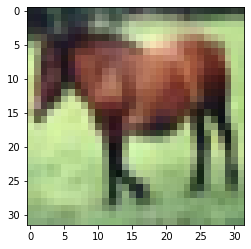

class : [7] => horse


In [7]:
show_xy_2(7)

# Preprecessing

In [8]:
print('max:',np.max(x_train) ,', min:',np.min(x_train) ,', mean:',np.mean(x_train))
print('max:',np.max(x_test) ,', min:',np.min(x_test) ,', mean:',np.mean(x_test))

max: 255 , min: 0 , mean: 120.70756512369792
max: 255 , min: 0 , mean: 121.52915475260417


#### scale the input

In [9]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [10]:
print('max:',np.max(x_train_scaled) ,', min:',np.min(x_train_scaled) ,', mean:',np.mean(x_train_scaled))
print('max:',np.max(x_test_scaled) ,', min:',np.min(x_test_scaled) ,', mean:',np.mean(x_test_scaled))

max: 1.0 , min: 0.0 , mean: 0.4733630004850874
max: 1.0 , min: 0.0 , mean: 0.47658492059844665


#### encode the output OHE

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
#Converts a class vector (integers) to binary class matrix.
y_train_encoded = keras.utils.to_categorical(y_train , num_classes=len(np.unique(y_train)))
y_test_encoded = keras.utils.to_categorical(y_test , num_classes=len(np.unique(y_test)))

# ANN

#### Train

In [19]:
x_train_scaled.shape , y_train_encoded.shape

((50000, 32, 32, 3), (50000, 10))

In [23]:
ANN = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(40 , activation='relu'),
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])

ANN.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
ANN.fit(x_train_scaled , y_train_encoded , epochs=5)
ANN.evaluate(x_test_scaled,y_test_encoded)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9898 - accuracy: 0.2771
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7978 - accuracy: 0.3548
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7187 - accuracy: 0.3863
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6671 - accuracy: 0.4070
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.6644 - accuracy: 0.4118


[1.6643904447555542, 0.41179999709129333]

In [22]:
# sparse_categorical_crossentropy
ANN2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(40 , activation='relu'),
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
])

ANN2.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ANN2.fit(x_train_scaled , y_train , epochs=5)
ANN2.evaluate(x_test_scaled,y_test)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9667 - accuracy: 0.2840
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7894 - accuracy: 0.3599
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7141 - accuracy: 0.3867
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6644 - accuracy: 0.4072
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.6678 - accuracy: 0.4034


[1.6678301095962524, 0.4034000039100647]

#### Test

In [26]:
y_pred = ANN.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [42]:
print(y_pred[2])
print(np.argmax(y_pred[2]))
print(y_test[2])
print(classes_name[np.argmax(y_pred[1])])

[0.96350104 0.9690053  0.23832266 0.39996517 0.30711973 0.1817535
 0.01227922 0.49484137 0.9909749  0.9754798 ]
8
[8]
truck


Truth :  [4] = deer
Predicted :  7 = horse


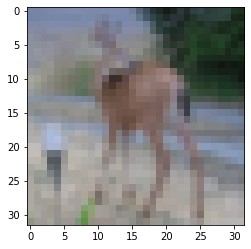

In [58]:
def predict(i):
    print('Truth : ',y_test[i],'=',classes_name[y_test[i][0]])
    plt.imshow(x_test[i])
    print('Predicted : ',np.argmax(y_pred[i]),'=',classes_name[np.argmax(y_pred[i])])
    
predict(100)

#### Metrics

In [98]:
# confusion_matrix(y_test, y_pred)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
clf_reports = classification_report(y_test, y_pred_labels)
print(cm)


[[496  72   4  14  43   1  16  27 182 145]
 [ 30 620   0  12  18   5  17  22  64 212]
 [171  73  70  76 292  60  93  78  44  43]
 [ 77 121  18 235  81 152  95  60  43 118]
 [ 88  52  28  48 475  35 110  76  26  62]
 [ 59  83  25 173 110 259  84  94  54  59]
 [ 15  83  18  87 202  43 443  25  19  65]
 [ 65  78  17  47 138  40  31 412  23 149]
 [145 106   1  13  10  10   4  11 519 181]
 [ 30 250   0  17  13   8  15  25  53 589]]


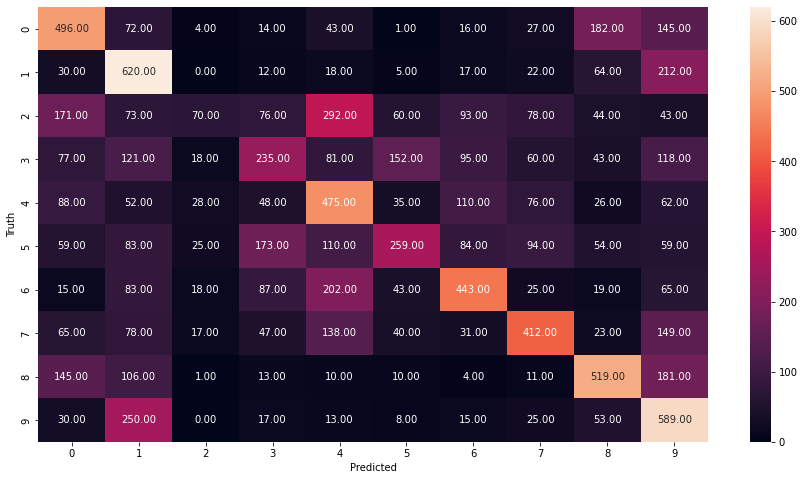

In [95]:
plt.figure(figsize=(15,8))
sn.heatmap(cm ,annot=True , fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [99]:
print(clf_reports)

              precision    recall  f1-score   support

           0       0.42      0.50      0.46      1000
           1       0.40      0.62      0.49      1000
           2       0.39      0.07      0.12      1000
           3       0.33      0.23      0.27      1000
           4       0.34      0.47      0.40      1000
           5       0.42      0.26      0.32      1000
           6       0.49      0.44      0.46      1000
           7       0.50      0.41      0.45      1000
           8       0.51      0.52      0.51      1000
           9       0.36      0.59      0.45      1000

    accuracy                           0.41     10000
   macro avg       0.42      0.41      0.39     10000
weighted avg       0.42      0.41      0.39     10000



# CNN

#### Train

In [104]:
CNN = keras.models.Sequential([
    
    # cnn layers
    keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)), # 32 Filter 3x3
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # fully connected layers
    keras.layers.Flatten(),
    keras.layers.Dense(40 , activation='relu'),
    keras.layers.Dense(20 , activation='relu'),
    keras.layers.Dense(10 , activation='softmax') # softmax for multi-class classification 
])

CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN.fit(x_train_scaled , y_train_encoded , epochs=5)
CNN.evaluate(x_test_scaled , y_test_encoded)

Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5694 - accuracy: 0.4282
Epoch 2/5
1563/1563 [==============================] - 74s 48ms/step - loss: 1.1922 - accuracy: 0.5756
Epoch 3/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0635 - accuracy: 0.6250
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9832 - accuracy: 0.6564
Epoch 5/5
313/313 [==============================] - 5s 13ms/step - loss: 0.9910 - accuracy: 0.6573


[0.9909642338752747, 0.6572999954223633]

#### Test

In [105]:
y_pred_cnn = CNN.predict(x_test_scaled)

313/313 [==============================] - 4s 14ms/step


In [107]:
print(y_pred_cnn[2])
print(np.argmax(y_pred_cnn[2]))
print(y_test[2])
print(classes_name[np.argmax(y_pred[1])])

[0.16690378 0.14503914 0.01124666 0.01120844 0.00459155 0.00233846
 0.00182883 0.00672493 0.60265845 0.04745974]
8
[8]
truck


Truth :  [4] = deer
Predicted :  7 = horse


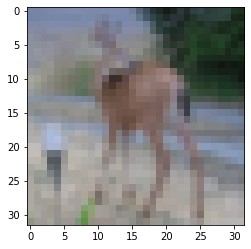

In [108]:
def predict_cnn(i):
    print('Truth : ',y_test[i],'=',classes_name[y_test[i][0]])
    plt.imshow(x_test[i])
    print('Predicted : ',np.argmax(y_pred_cnn[i]),'=',classes_name[np.argmax(y_pred_cnn[i])])
    
predict(100)

#### Metrics

In [109]:
# confusion_matrix(y_test, y_pred)
y_pred_cnn_labels = [np.argmax(i) for i in y_pred_cnn]
cm_cnn = confusion_matrix(y_test, y_pred_cnn_labels)
clf_reports_cnn = classification_report(y_test, y_pred_cnn_labels)
print(cm_cnn)

[[791  20  34  11   5   8   6   8  91  26]
 [ 51 777   9   7   2   8   9   5  26 106]
 [130  16 521  48  66  87  47  46  16  23]
 [ 79  14  87 386  47 223  44  63  31  26]
 [ 66   6 135  52 478  38  66 135  20   4]
 [ 33   4  63 113  28 627  12  83  23  14]
 [ 21   5  65  74  19  39 730  17  15  15]
 [ 51   4  43  23  40  70   5 731   7  26]
 [130  35  10   5   3   9   0   7 774  27]
 [ 63  88  10  17   3   7   4   7  43 758]]


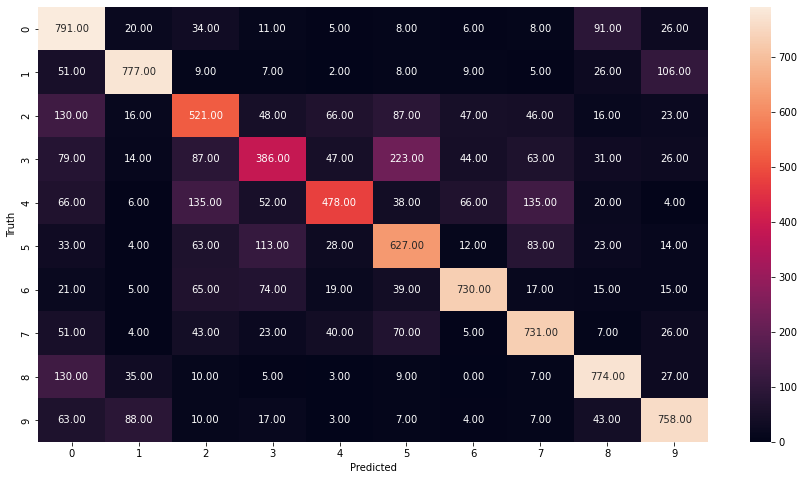

In [110]:
plt.figure(figsize=(15,8))
sn.heatmap(cm_cnn ,annot=True , fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [111]:
print(clf_reports_cnn)

              precision    recall  f1-score   support

           0       0.56      0.79      0.66      1000
           1       0.80      0.78      0.79      1000
           2       0.53      0.52      0.53      1000
           3       0.52      0.39      0.44      1000
           4       0.69      0.48      0.57      1000
           5       0.56      0.63      0.59      1000
           6       0.79      0.73      0.76      1000
           7       0.66      0.73      0.70      1000
           8       0.74      0.77      0.76      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



In [122]:
y_pred_labels[:10]

[6, 9, 8, 0, 4, 6, 3, 4, 0, 1]

In [117]:
y_pred_cnn_labels[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [121]:
print(y_test[:10].reshape(-1))

[3 8 8 0 6 6 1 6 3 1]
